In [2]:
import matplotlib.pyplot as plt
from utils import *
import plotly.express as px
import scipy

In [3]:
!python -m serial.tools.list_ports

/dev/ttyACM0        
/dev/ttyUSB0        
2 ports found


In [13]:
port = "/dev/ttyUSB0"
df = read_measurements_df(port=port, duration=10)

In [14]:
df

,timestamp,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6
0,0.000000,17.61,15.16,-7.45,-34.35,-0.98,18.74
1,0.013257,17.41,17.91,-21.55,-37.87,-70.70,14.40
2,0.026559,14.63,7.28,-10.42,-54.81,-79.12,11.48
3,0.039781,22.27,9.93,5.20,-50.84,-77.80,13.42
4,0.053185,27.70,10.37,-5.62,-41.52,-69.94,15.53
...,...,...,...,...,...,...,...
745,9.938419,18.28,17.64,-3.06,-45.51,-73.86,13.77
746,9.951716,14.27,14.56,-3.99,-29.14,-1.35,17.16
747,9.965058,21.62,10.89,0.82,-36.28,-67.99,18.47
748,9.978369,16.68,-0.43,-9.31,-43.84,-74.70,15.52


In [4]:
#df.drop('timestamp', axis=1).median().to_csv('sensor_calibration.csv', index_label=False)

In [48]:
#a = pd.read_csv('sensor_calibration.csv')

In [12]:
df.to_csv('dynamic_sensor_data.csv', index_label=False)

In [24]:
df

,timestamp,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6
0,0.000000,17.61,15.16,-7.45,-34.35,-0.98,18.74
1,0.013257,17.41,17.91,-21.55,-37.87,-70.70,14.40
2,0.026559,14.63,7.28,-10.42,-54.81,-79.12,11.48
3,0.039781,22.27,9.93,5.20,-50.84,-77.80,13.42
4,0.053185,27.70,10.37,-5.62,-41.52,-69.94,15.53
...,...,...,...,...,...,...,...
745,9.938419,18.28,17.64,-3.06,-45.51,-73.86,13.77
746,9.951716,14.27,14.56,-3.99,-29.14,-1.35,17.16
747,9.965058,21.62,10.89,0.82,-36.28,-67.99,18.47
748,9.978369,16.68,-0.43,-9.31,-43.84,-74.70,15.52


In [46]:
df_calibrated = df - df.drop('timestamp', axis=1).median()

In [47]:
df_calibrated.timestamp = df.timestamp

In [28]:
df.drop('timestamp', axis=1).median()

sensor_1    18.280
sensor_2    10.345
sensor_3    -6.835
sensor_4   -42.460
sensor_5   -73.020
sensor_6    15.625
dtype: float64

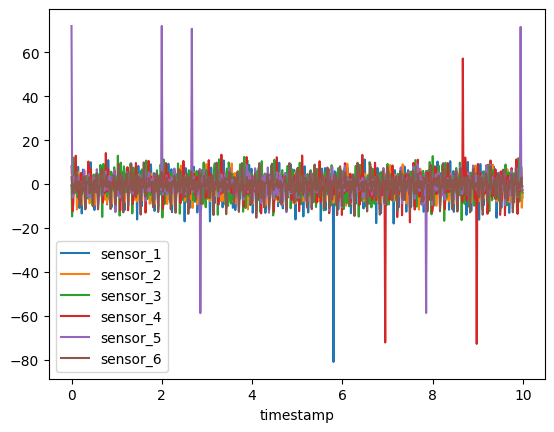

In [48]:
df_calibrated.plot(x='timestamp')
plt.show()

In [52]:
(df_calibrated.drop('timestamp', axis=1)**2).mean().sum()

197.57062526666664

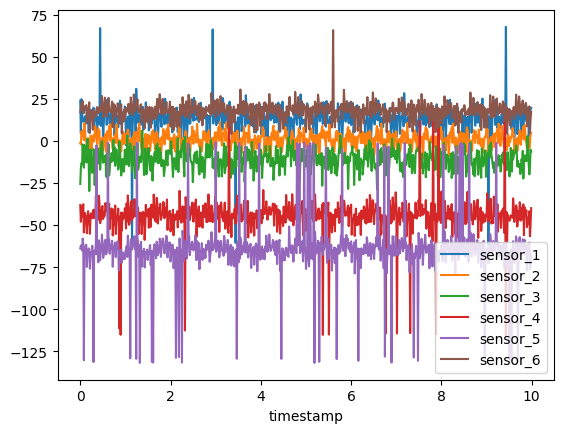

In [6]:
df.plot(x='timestamp')
plt.show()

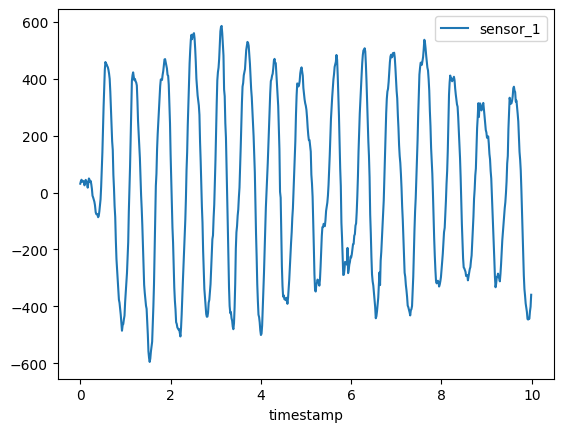

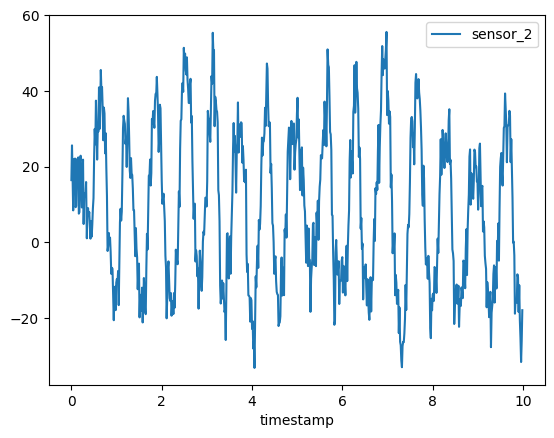

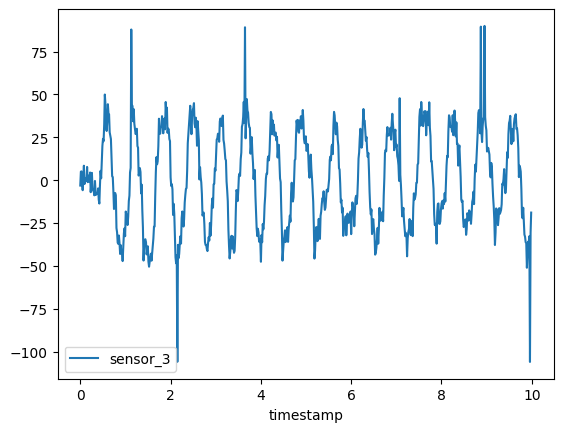

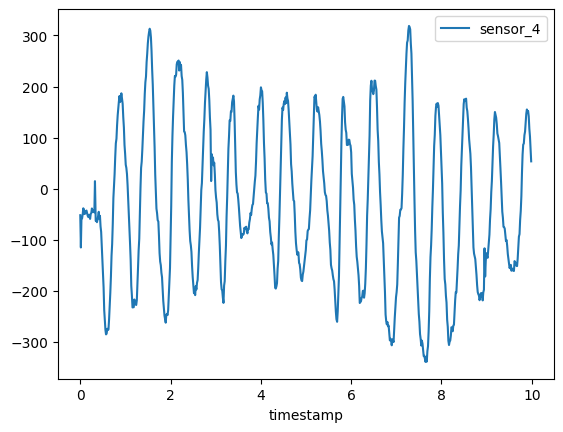

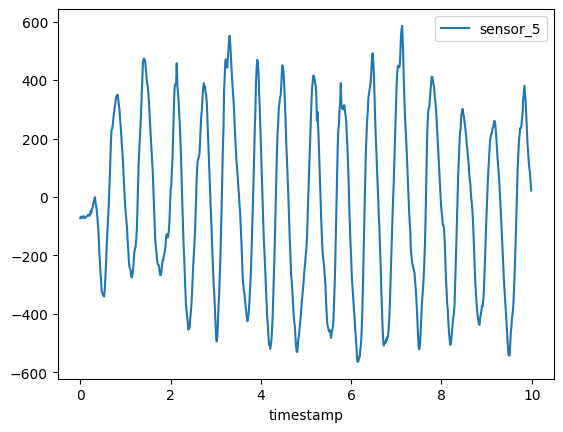

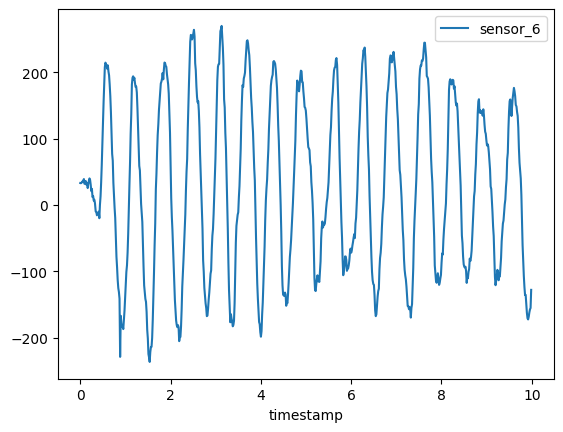

In [11]:
for sensor in sensors_col:
    df.plot(x='timestamp', y=sensor)
    plt.show()

In [15]:
df.mean()

sensor_1     2.788506e+01
sensor_2     3.224074e+01
sensor_3     5.284534e+01
sensor_4    -8.899800e+00
sensor_5    -4.544580e+00
sensor_6     4.886186e+01
timestamp    1.692323e+09
dtype: float64

In [6]:
df.to_csv("sensor_comparison/python.csv", index=False)

In [12]:
fig = px.line(df,x='timestamp', y=[f'sensor_{i}' for i in range(1,7)]+['lift', 'thrust'])
#fig.show()
fig.write_html('sensor_comparison/pyhton.html')